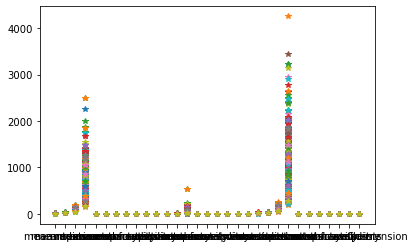

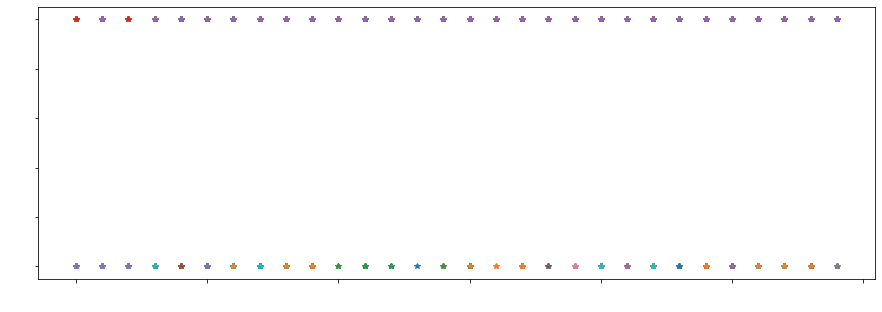

The optimal value of b : 27
accuracy_model on training data : 84.83516483516483


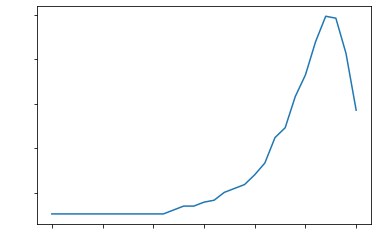

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#for splitting the data into train and test
from sklearn.model_selection import train_test_split
#for model evaluation
from sklearn.metrics import accuracy_score
#for getting the breast cancer dataset
import sklearn.datasets 

#loading the data from sklearn library
cancer = sklearn.datasets.load_breast_cancer()
#converting data into pandas dataframe
data = pd.DataFrame(cancer.data,columns=cancer.feature_names)
data["Class"] = cancer.target
data.head()

plt.plot(data.T,'*')
plt.show()

#splitting data intp independent and target values
x = data.drop('Class',axis=1)
y = data['Class']

#splitting the entire data into train and test datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3,stratify = y)

x_train_binarized = x_train.apply(pd.cut,bins = 2 ,labels = [1,0]).values
x_test_binarized = x_test.apply(pd.cut,bins=2,labels =[1,0]).values
 
#plotting the data
plt.figure(figsize=(15,5))
plt.plot(x_train_binarized.T,'*')
plt.xticks(rotation='vertical',c='white',size=15)
plt.yticks(c='white',size=15)
plt.show()

class MP_Neuron:
  #intializing the parameter value to 0
  def __init__(self):
    self.b = 0
  #defining the model
  def Model(self,x):
    return np.sum(x)>=self.b
  #optimising algorithm
  def fit(self,x,y):
    #for storing accuracies for differnt value of b
    accuracy = {}
    #since the range of b is from [0,n]
    for b in range(x.shape[1] + 1):
      self.b = b
      yhat = []
      for row in x:
          yhat.append(self.Model(row)) 
      accuracy[b] = accuracy_score(yhat,y)
    best_b = max(accuracy,key = accuracy.get)
    self.b = best_b
    return [accuracy,best_b,accuracy[best_b]]
  def predict(self,x,y):
    yhat = []
    for row in x:
      yhat.append(self.Model(row))
    accuracy = accuracy_score(y,yhat)
    return accuracy

neuron = MP_Neuron()
accuracy, best_b, accuracy_model = neuron.fit(x_train_binarized,y_train)
print("The optimal value of b :",best_b)
print("accuracy_model on training data :",accuracy_model*100)

#since accuracy is a dictionary,
#we convert into list for plotting
accuracies = list(accuracy.values())
plt.plot(accuracies)
plt.xticks(c='white')
plt.yticks(c='white')
plt.show()

#testing model on test data set
accuracy = neuron.predict(x_test_binarized,y_test)
print("The accuracy of model on test data is :",accuracy*100)